###### This exercise aims to make you comfortable with the basic image processing tools and libraries. This exercise will serve as a starting point before you dive deep into the course. 

In [24]:
import numpy as np                 # numpy library useful for most of the mathematical operations
import matplotlib.pyplot as plt    # useful for data visualization/plotting purpose. Can also be used for image visualization.
import math
# For this exercise, we will restrict ourselves to matplotlib only. Please note that other libraries such as PIL, OpenCV
# can also be used as image processing libraries.

In [25]:
# Function to plot RGB or Gray image with appropriate colour scheme
def plotImage(image, title=''):
    plt.figure()
    if np.ndim(image) == 3 and image.shape[-1] == 3:
        plt.imshow(image)
        plt.title(title)
    elif np.ndim(image) == 2:
        plt.imshow(image, cmap='gray')
        plt.title(title)


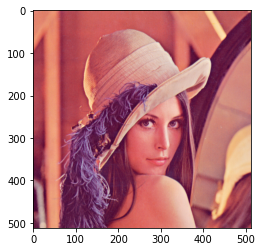

In [26]:
image = plt.imread("lena.png")
plt.imshow(image)

# 1. Image Information

###### Task1.1 : write code to find image dimension and print it

In [ ]:
print('The dimensions of the image are {}.'.format(image.shape))

The dimensions of the image are (512, 512, 3).


In [ ]:
numChannels = 1 if np.ndim(image) == 2 else image.shape[2]
print("The number of channels in this image is {}.".format(numChannels))
if numChannels == 3:
    print("This is a RGB Image.")
elif numChannels == 1:
    print("This is a B&W Image.")
print("Aspect ratio of this image is {}".format(image.shape[1]/image.shape[0]))

The number of channels in this image is 3.
This is a RGB Image.
Aspect ratio of this image is 1.0


###### Task1.2:  Visualization of each channel

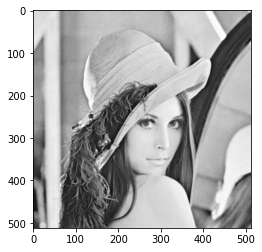

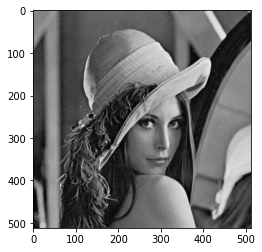

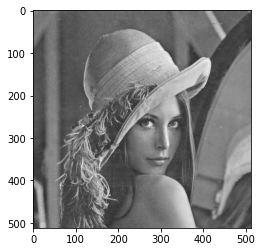

In [27]:
def VisualizeChannel(image,channel):
    '''
    This function is helpful to visualize a specific channel of an RGB image.
    image: RGB image
    channel: channel, one wish to visualize (can take value 0 (for red), 1(green), 2(blue))
    '''
    if channel not in range(3):
        return None
    output = image[:, :, int(channel)]

    return output    # 'output' is image's particular channel values 


for i in range(3):
    plotImage(VisualizeChannel(image, i))


In [ ]:
image_chs = []
for j in range(3):
    image_chs.append(VisualizeChannel(image, j))

for i in range(3):
    print("Some information on channel {} of the image:".format(i))
    print("\tMaximum intensity value is {}".format(np.amax(image_chs[i])))
    print("\tMinimum intensity value is {}".format(np.amin(image_chs[i])))
    print("\tRange of intensity values is {}\n".format(np.amax(image_chs[i]) - np.amin(image_chs[i])))

Some information on channel 0 of the image:
	Maximum intensity value is 1.0
	Minimum intensity value is 0.21176470816135406
	Range of intensity values is 0.7882353067398071

Some information on channel 1 of the image:
	Maximum intensity value is 0.9725490212440491
	Minimum intensity value is 0.0117647061124444
	Range of intensity values is 0.9607843160629272

Some information on channel 2 of the image:
	Maximum intensity value is 0.8823529481887817
	Minimum intensity value is 0.0313725508749485
	Range of intensity values is 0.8509804010391235



# 2. Intensity Manipulations

###### Task2.1: RGB to Gray  

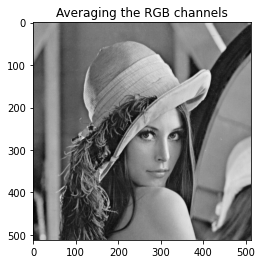

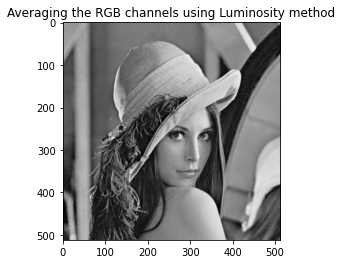

In [28]:
def rgbToGrayAverage(image):
    '''
    This function converts an RGB image to grayscale
    image: RGB image
    '''
    gray = np.mean(image, axis=2)

    return gray       #'gray' is grayscale image, converted from RGB image

def rgbToGrayLuminosity(image):
    '''
    This function converts an RGB image to grayscale
    image: RGB image
    '''
    gray = image[:, :, 0]*0.3 + image[:, :, 1]*0.59 + image[:, :, 2]*0.11

    return gray       #'gray' is grayscale image, converted from RGB image


plotImage(rgbToGrayAverage(image), 'Averaging the RGB channels')
plotImage(rgbToGrayLuminosity(image), 'Averaging the RGB channels using Luminosity method')


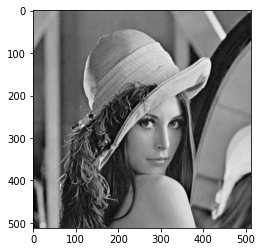

In [29]:
image_gray = rgbToGrayLuminosity(image)
plotImage(image_gray)

###### Task2.2 : Gray to Binary

In [30]:
def grayToBinary(image,T):
    '''
    This function converts a gray image to binary based on the rule stated above. 
    image: image (can be RGB or gray); if the image is RGB, convert it to gray first
    T: Threshold
    '''
    # T needs to be in (0, 1] for this operation to make any sense in general. 
    # If it is outside this range, we will get a full black or white image.

    # Converting to gray if 'image' is RGB.
    numDims = np.ndim(image)
    if numDims == 3:
        image = rgbToGrayLuminosity(image)
    
    indices = (image >= T)
    bimage = np.zeros(image.shape)
    bimage[indices] = 1
    
    return bimage
    

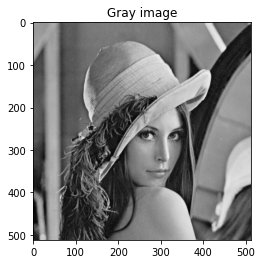

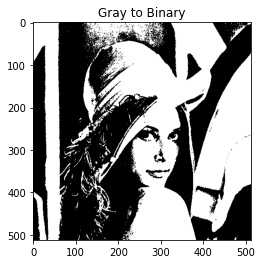

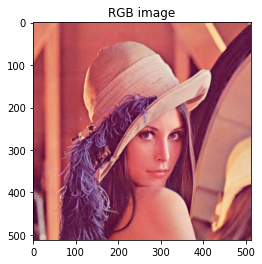

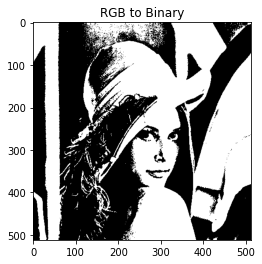

In [31]:
T = 0.5
bimage = grayToBinary(image_gray, T)
plotImage(image_gray, 'Gray image')
plotImage(bimage, 'Gray to Binary')

bimage = grayToBinary(image, T)
plotImage(image, 'RGB image')
plotImage(bimage, 'RGB to Binary')

######  Task2.3:  Crop a 5*5 section of a gray image

In [33]:
def imageCrop(image,r0,c0):
    '''
    This function crops 5*5 rectangular patch defined by image coordinates(r0,c0),(r0,c0+5),(r0+5,c0) and (r0+5,c0+5) 
    of an image.
    image: Image can be RGB or gray
    r0: starting row index
    c0: starting column index
    '''
    # Converting to gray if it is RGB
    numDims = np.ndim(image)
    if numDims == 3:
        image = rgbToGrayLuminosity(image)
    
    # Returning None if r0 and c0 values given are invalid.
    if r0 < 0 or r0+4 >= image.shape[0] or c0 < 0 or c0+4 >= image.shape[1]:
        return None
    
    patch = image[r0:r0+5, c0:c0+5]
    plotImage(patch)    
    
    return patch

[[0.639451   0.6459216  0.638902   0.63513726 0.61835295]
 [0.6359216  0.635451   0.65003926 0.62784314 0.5971373 ]
 [0.6254902  0.6307451  0.62584317 0.6432157  0.6151373 ]
 [0.62941176 0.6436079  0.6453334  0.615451   0.6121961 ]
 [0.62490195 0.64082354 0.63274515 0.62219614 0.6027843 ]]


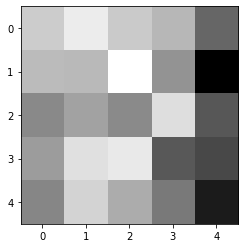

In [34]:
r0 = 30
c0 = 50
patch = imageCrop(image,r0,c0)
print(patch)


In [35]:
print(0.5*patch)
print(2*patch)
rand_patch = np.random.randn(5,5)
print(patch - rand_patch)


[[0.3197255  0.3229608  0.319451   0.31756863 0.30917647]
 [0.3179608  0.3177255  0.32501963 0.31392157 0.29856864]
 [0.3127451  0.31537256 0.31292158 0.32160786 0.30756864]
 [0.31470588 0.32180396 0.3226667  0.3077255  0.30609804]
 [0.31245098 0.32041177 0.31637257 0.31109807 0.30139214]]
[[1.278902  1.2918432 1.277804  1.2702745 1.2367059]
 [1.2718432 1.270902  1.3000785 1.2556863 1.1942745]
 [1.2509804 1.2614902 1.2516863 1.2864314 1.2302746]
 [1.2588235 1.2872158 1.2906668 1.230902  1.2243922]
 [1.2498039 1.2816471 1.2654903 1.2443923 1.2055686]]
[[ 0.73848718 -0.83802196  0.97616897  0.06227306  0.52175721]
 [ 0.14751365  0.71346262  1.01525487 -0.08632126  2.13580248]
 [-1.24530724  0.52980127  2.68945811 -0.27481982 -0.95265782]
 [ 0.95910523  1.24238972  2.02776764  0.59528937  0.46792282]
 [ 1.03271869  1.72271439  1.22979307  1.05718107 -0.24347408]]


###### Task2.4: Uniform Brightness Scaling

In [36]:
def uniformBrightnessScaling(image,scale):
    '''
    This function uniformly increases or decreases the pixel values (of all image locations) by a factor 'scale'.
    image: image (can be RGB or gray image)
    scale: A scalar by which pixels'svalues need to be multiplied
    '''
    # Scaling the image by scale
    scaled_image = image * scale    
    
    #display the resultant image
    plotImage(image, 'Unscaled Image')
    plotImage(scaled_image, 'Scaled Image (scale = {})'.format(scale))
    
    return scaled_image        #replace output with the variable name you used for final result
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


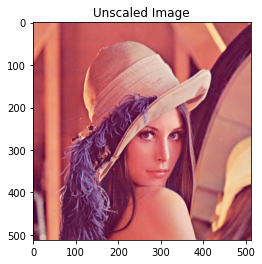

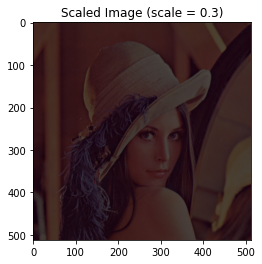

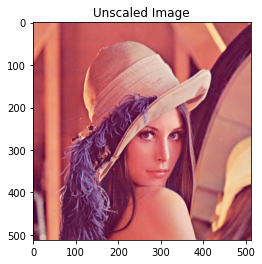

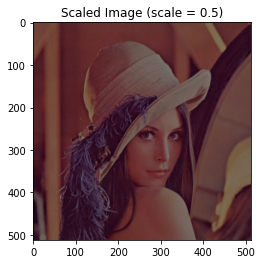

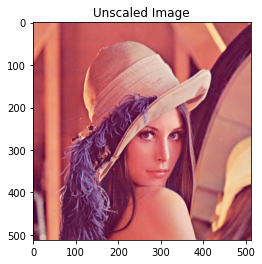

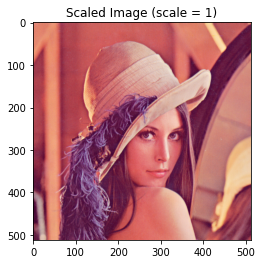

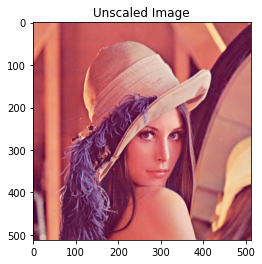

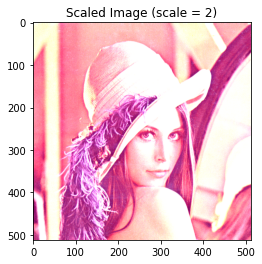

In [37]:
img = uniformBrightnessScaling(image, 0.3)
img = uniformBrightnessScaling(image, 0.5)
img = uniformBrightnessScaling(image, 1)
img = uniformBrightnessScaling(image, 2)


# 3. Image Filtering

In [39]:
def featureExtractor(image,kernel):
    '''
    This function performs convolution operation to a gray image. We will consider 3*3 kernel here. 
    In general kernel can have shape (2n+1) * (2n+1)  where n>= 0
    image: image (can be RGB or gray); if RGB convert it to gray
    kernel: 3*3 convolution kernel
    '''
    # Converting to gray if it is RGB
    numDims = np.ndim(image)
    if numDims == 3:
        image = rgbToGrayLuminosity(image)

    numRows = kernel.shape[0]
    numCols = kernel.shape[1]
    output = np.zeros_like(image)
    # Padded image that we will use while performing the convolution
    pad_image = np.zeros((image.shape[0]+numRows-1, image.shape[1]+numCols-1))
    pad_image[(numRows-1)//2:(numRows-1)//2 + image.shape[0], (numCols-1)//2:(numCols-1)//2 + image.shape[1]] = image    
    
    # Convolution  operation
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            output[i, j] = np.sum(pad_image[i:i+numRows, j:j+numCols] * kernel)

    return output

In [40]:
def featureExtractorColour(image,kernel):
    '''
    This function performs convolution operation to a RGB image. We will consider 3*3 kernel here. 
    In general kernel can have shape (2n+1) * (2n+1)  where n>= 0
    image: image (RGB)
    kernel: 3*3 convolution kernel
    '''
    numRows = kernel.shape[0]
    numCols = kernel.shape[1]
    output = np.zeros_like(image)
    # Padded image that we will use while performing the convolution
    pad_image = np.zeros((image.shape[0]+numRows-1, image.shape[1]+numCols-1, 3))
    pad_image[(numRows-1)//2:(numRows-1)//2 + image.shape[0], (numCols-1)//2:(numCols-1)//2 + image.shape[1], :] = image
    # stacked_kernel is kernel stacked 3 times to account for the 3 channels in the RGB image
    stacked_kernel = np.zeros((numRows, numCols, 3))
    for i in range(3):
        stacked_kernel[:, :, i] = kernel
    # Convolution  operation
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
                output[i, j, :] = np.sum(pad_image[i:i+numRows, j:j+numCols, :] * stacked_kernel, axis=(0,1))

    return output

In [ ]:
## Note that the steps described above are to help you get started. You can follow other valid steps too. Result from all 
 #of the method should be the same. Pseudocode is available at: https://en.wikipedia.org/wiki/Kernel_(image_processing)

In [41]:
# Dictionary to hold the different kernels
kernels = {}
kernels['identity'] = np.array([[0,0,0],[0,1,0],[0,0,0]])
kernels['edge0'] = np.array([[1,0,-1],[0,0,0],[-1,0,1]])
kernels['edge4'] = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
kernels['edge8'] = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
kernels['sharpen'] = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
kernels['boxblur'] = np.ones((3,3))/9
kernels['gaussianblur'] = np.array([[1,2,1],[2,4,2],[1,2,1]])/16

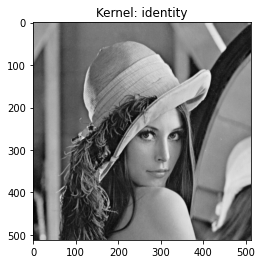

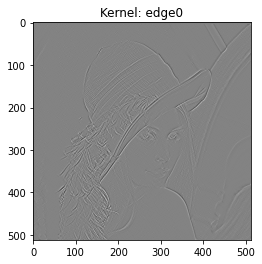

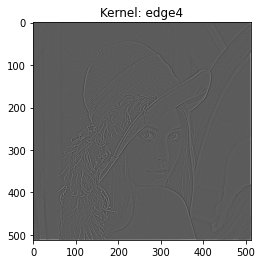

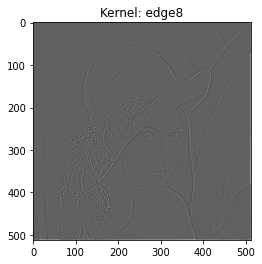

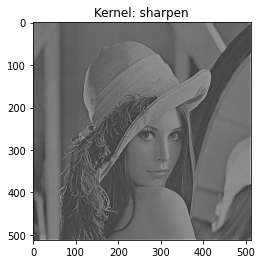

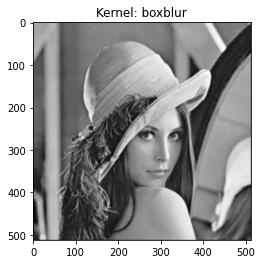

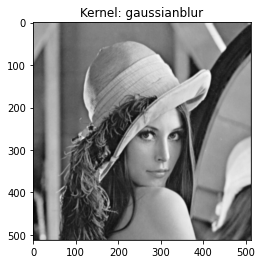

In [42]:
for item in kernels.keys():
    plotImage(featureExtractor(image, kernels[item]), 'Kernel: {}'.format(item))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


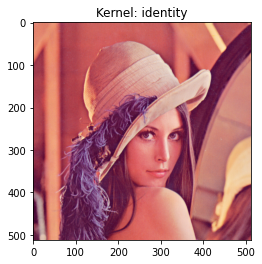

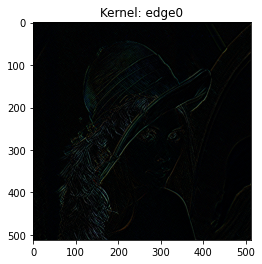

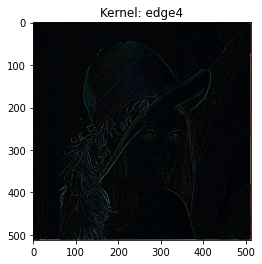

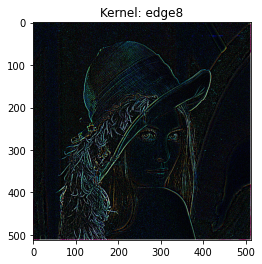

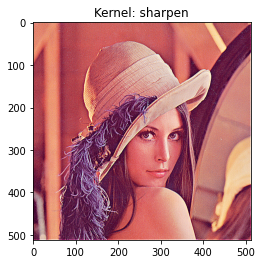

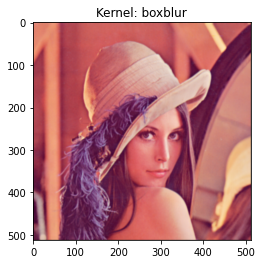

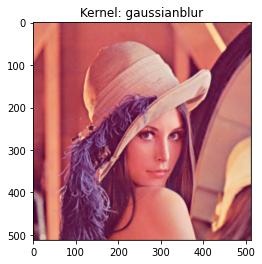

In [43]:
for item in kernels.keys():
    plotImage(featureExtractorColour(image, kernels[item]), 'Kernel: {}'.format(item))


# 4.Geometric Transformation

###### Task4.1: Image Rotation (In-plane)

In [44]:
def rotateImage(image, angle, centered=True):
    # centered is used to indicate if we want the rotation about a centered axis or axis at the top left corner of the image
    if centered:
        axisX = (image.shape[0]-1)/2
        axisY = (image.shape[1]-1)/2
    else:
        axisX = 0
        axisY = 0

    angle_rad = angle*np.pi/180
    output = np.zeros_like(image)
    # The matrix that we need to multiply with the target coordinates to get correponding source coordinates
    matrix = np.array([[np.cos(angle_rad), np.sin(angle_rad)], [-np.sin(angle_rad), np.cos(angle_rad)]])
    # Used to know if the image given is RGB or gray
    dims = np.ndim(image)

    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            # Coordinates of the axis
            axis_coords = np.array([[axisX], [axisY]])
            # Coordinates in the target that we will try to map to coordinates in the source image
            target_coords = np.array([[i], [j]])
            # Coordinates in the source that map to target_coords
            source_coords = np.squeeze((matrix@(target_coords-axis_coords)) + axis_coords)

            # Handling the case where source_coords obtained is in the bulk of the source image
            if source_coords[0]>=0 and source_coords[0]<image.shape[0]-1 and source_coords[1]>=0 and source_coords[1]<image.shape[1]-1:
                fracX, baseX = math.modf(source_coords[0])
                fracY, baseY = math.modf(source_coords[1])
                baseX = int(baseX)
                baseY = int(baseY)
                if dims == 2:
                    output[i, j] = (1-fracX)*(1-fracY)*image[baseX, baseY] + (fracX)*(1-fracY)*image[baseX+1, baseY] + (1-fracX)*(fracY)*image[baseX, baseY+1] + (fracX)*(fracY)*image[baseX+1, baseY+1]
                else:
                    output[i, j, :] = (1-fracX)*(1-fracY)*image[baseX, baseY, :] + (fracX)*(1-fracY)*image[baseX+1, baseY, :] + (1-fracX)*(fracY)*image[baseX, baseY+1, :] + (fracX)*(fracY)*image[baseX+1, baseY+1, :]
            
            # Handling the case where source_coords points to right or left edge of the source image
            elif source_coords[0]>=0 and source_coords[0]<image.shape[0]-1 and (math.ceil(source_coords[1]) == 0 or math.floor(source_coords[1]) == image.shape[1]-1):
                # Left edge case
                if math.ceil(source_coords[1]) == 0:
                    fracX, baseX = math.modf(source_coords[0])
                    baseX = int(baseX)
                    if dims == 2:
                        output[i, j] = (1-fracX)*image[baseX, 0] + (fracX)*image[baseX+1, 0]
                    else:
                        output[i, j, :] = (1-fracX)*image[baseX, 0, :] + (fracX)*image[baseX+1, 0, :]
                # Right edge case
                else:
                    fracX, baseX = math.modf(source_coords[0])
                    baseX = int(baseX)
                    if dims == 2:
                        output[i, j] = (1-fracX)*image[baseX, image.shape[1]-1] + (fracX)*image[baseX+1, image.shape[1]-1]
                    else:
                        output[i, j, :] = (1-fracX)*image[baseX, image.shape[1]-1, :] + (fracX)*image[baseX+1, image.shape[1]-1, :]

            # Handling the case where source_coords points to top or bottom edge of the source image
            elif source_coords[1]>=0 and source_coords[1]<image.shape[1]-1 and (math.ceil(source_coords[0]) == 0 or math.floor(source_coords[0]) == image.shape[0]-1):
                # Top edge case
                if math.ceil(source_coords[0]) == 0:
                    fracY, baseY = math.modf(source_coords[1])
                    baseY = int(baseY)
                    if dims == 2:
                        output[i, j] = (1-fracY)*image[0, baseY] + (fracY)*image[0, baseY+1]
                    else:
                        output[i, j, :] = (1-fracY)*image[0, baseY, :] + (fracY)*image[0, baseY+1, :]
                # Bottom edge case
                else:
                    fracY, baseY = math.modf(source_coords[1])
                    baseY = int(baseY)
                    if dims == 2:
                        output[i, j] = (1-fracY)*image[image.shape[0]-1, baseY] + (fracY)*image[image.shape[0]-1, baseY+1]
                    else:
                        output[i, j, :] = (1-fracY)*image[image.shape[0]-1, baseY, :] + (fracY)*image[image.shape[0]-1, baseY+1, :]
    
    return output


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


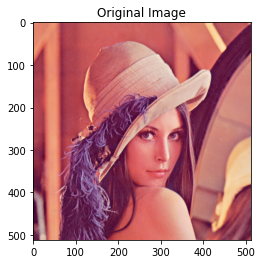

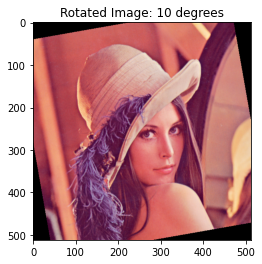

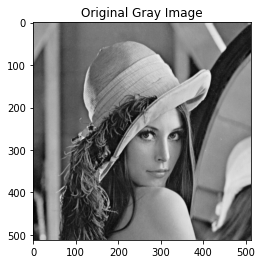

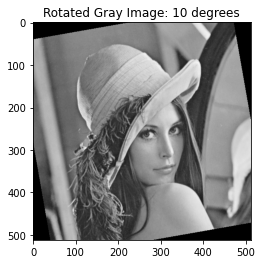

In [48]:
theta = 10
rotated_image = rotateImage(image, theta)
plotImage(image, 'Original Image')
plotImage(rotated_image, 'Rotated Image: {} degrees'.format(theta))

rotated_image = rotateImage(image_gray, theta)
plotImage(image_gray, 'Original Gray Image')
plotImage(rotated_image, 'Rotated Gray Image: {} degrees'.format(theta))

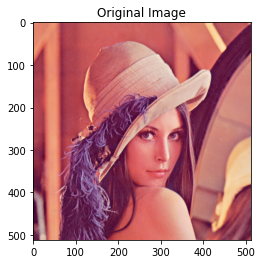

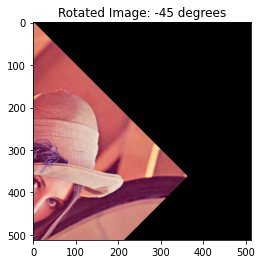

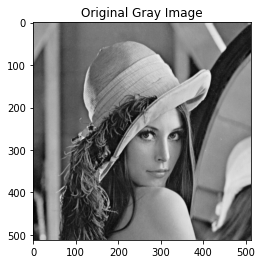

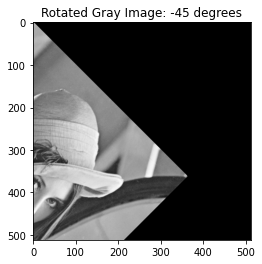

In [49]:
theta = -45
rotated_image = rotateImage(image, theta, False)
plotImage(image, 'Original Image')
plotImage(rotated_image, 'Rotated Image: {} degrees'.format(theta))

rotated_image = rotateImage(image_gray, theta, False)
plotImage(image_gray, 'Original Gray Image')
plotImage(rotated_image, 'Rotated Gray Image: {} degrees'.format(theta))

# 5. Solution of a system of equation 

###### Task5.1: Least square error

In [50]:
def leastSqSoln(A, b):
    '''
    Ax = b
    Convert the system of equations in form Ax = b
    '''
    # write your code here to find x'
    x = np.linalg.pinv(A)@b

    return x

In [51]:
A = np.array([[2,3,1], [1,-1,3]])
b = np.array([[1], [0]])
print('Result: ', leastSqSoln(A, b))
print('SVD: ', np.linalg.svd(A))

print('\n\n')

A = np.array([[1,1], [1,-1]])
b = np.array([[2.006], [0.001]])
target = np.array([1,1])
result = leastSqSoln(A, b)
print('Result: ', result)
print('Error: ', np.linalg.norm(np.squeeze(result)- target))
print('SVD: ', np.linalg.svd(A))


Result:  [[0.13333333]
 [0.23333333]
 [0.03333333]]
SVD:  (array([[-0.89442719, -0.4472136 ],
       [-0.4472136 ,  0.89442719]]), array([3.87298335, 3.16227766]), array([[-5.77350269e-01, -5.77350269e-01, -5.77350269e-01],
       [ 1.06926829e-16, -7.07106781e-01,  7.07106781e-01],
       [-8.16496581e-01,  4.08248290e-01,  4.08248290e-01]]))



Result:  [[1.0035]
 [1.0025]]
Error:  0.004301162633520789
SVD:  (array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]]), array([1.41421356, 1.41421356]), array([[-1., -0.],
       [-0., -1.]]))
